In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
all_xray_df = pd.read_csv('project_data/classifcation_data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('project_data', 'classifcation_data', 'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(20)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
53630,00013542_000.png,Nodule,0,13542,63,F,PA,2992,2991,0.143000,0.143000,NaN,project_data/classifcation_data/images_006/ima...
57831,00014320_050.png,No Finding,50,14320,26,F,AP,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_007/ima...
39544,00010350_034.png,No Finding,34,10350,53,F,AP,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_005/ima...
65366,00016142_014.png,No Finding,14,16142,14,M,AP,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_008/ima...
31104,00008081_017.png,Mass,17,8081,58,M,AP,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_004/ima...
10753,00002790_002.png,No Finding,2,2790,56,F,PA,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_002/ima...
33148,00008697_007.png,No Finding,7,8697,48,F,PA,2048,2500,0.168000,0.168000,NaN,project_data/classifcation_data/images_004/ima...
90605,00022566_021.png,Effusion|Infiltration,21,22566,90,F,AP,3056,2544,0.139000,0.139000,NaN,project_data/classifcation_data/images_010/ima...
32876,00008603_000.png,No Finding,0,8603,65,F,PA,2992,2991,0.143000,0.143000,NaN,project_data/classifcation_data/images_004/ima...
56723,00014112_008.png,Atelectasis|Effusion,8,14112,39,F,PA,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_007/ima...


In [3]:
new_df = all_xray_df[[not '|' in x for x in all_xray_df['Finding Labels']]]
new_df = new_df[new_df['Finding Labels'] != "No Finding"]
new_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
3932,00001075_032.png,Infiltration,32,1075,60,F,AP,3056,2544,0.139000,0.139000,NaN,project_data/classifcation_data/images_001/ima...
103962,00027726_060.png,Effusion,60,27726,58,M,AP,3056,2544,0.139000,0.139000,NaN,project_data/classifcation_data/images_011/ima...
17547,00004735_012.png,Pleural_Thickening,12,4735,66,F,PA,2021,2021,0.194311,0.194311,NaN,project_data/classifcation_data/images_003/ima...
59280,00014663_034.png,Nodule,34,14663,63,M,PA,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_007/ima...
37787,00009935_001.png,Pneumothorax,1,9935,61,M,PA,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_005/ima...
5515,00001481_000.png,Nodule,0,1481,53,F,PA,2992,2991,0.143000,0.143000,NaN,project_data/classifcation_data/images_002/ima...
63242,00015622_002.png,Pleural_Thickening,2,15622,33,F,PA,2274,2821,0.143000,0.143000,NaN,project_data/classifcation_data/images_007/ima...
448,00000114_000.png,Infiltration,0,114,65,M,PA,2992,2991,0.143000,0.143000,NaN,project_data/classifcation_data/images_001/ima...
72317,00017818_001.png,Infiltration,1,17818,28,M,AP,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_008/ima...
49678,00012615_004.png,Effusion,4,12615,57,F,AP,2500,2048,0.168000,0.168000,NaN,project_data/classifcation_data/images_006/ima...


In [4]:
MIN_CASES = 1000

from itertools import chain
all_labels = np.unique(list(chain(*new_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        new_df[c_label] = new_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

all_labels = [c_label for c_label in all_labels if new_df[c_label].sum()>MIN_CASES]

new_df= new_df[new_df['Finding Labels'].isin(all_labels)]

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


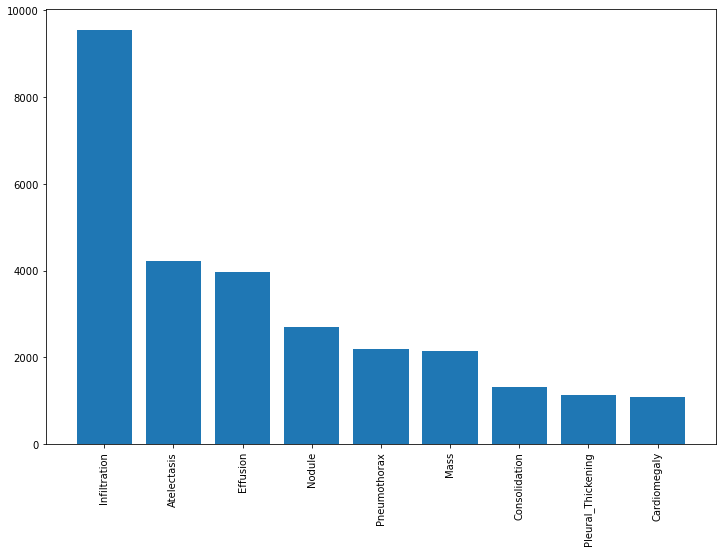

In [5]:
label_counts = new_df['Finding Labels'].value_counts()
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

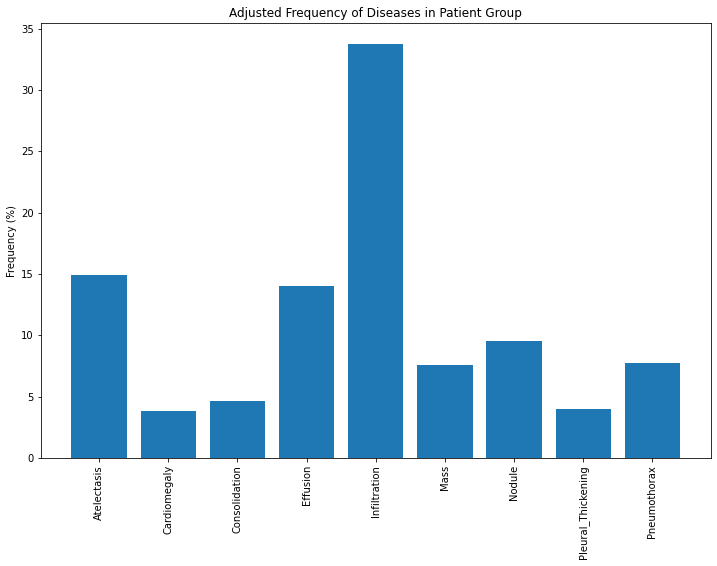

In [6]:
label_counts = 100*np.mean(new_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [13]:
print(len(new_df.index))

28284


In [7]:
import shutil
from skimage.io import imsave, imread
os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed'))
os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/train'))
os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/test'))
os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/val'))

for label in all_labels:
    os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/train/'+label))
    os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/test/'+label))
    os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/val/'+label))
    numTest = int(.15*len(new_df[label].index))
    numVal = int(.15*len(new_df[label].index)) + numTest
    for i, row in new_df[new_df['Finding Labels'] == label].iterrows():
        #source_image = imread(row['path'])
        if i < numTest:
            shutil.copyfile(row['path'],'/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/test/'+label+"/"+row["Image Index"])
            continue
        if i < numVal:
            shutil.copyfile(row['path'], '/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/val/'+label+"/"+row["Image Index"])
            continue
        else:
            shutil.copyfile(row['path'],'/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/train/'+label+"/"+row["Image Index"])
